In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


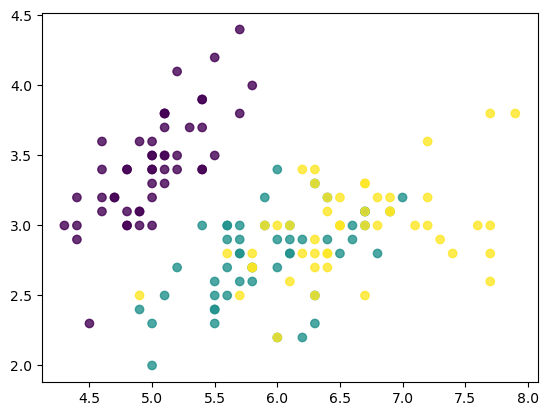

In [5]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.8)

# train_test_split

In [7]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}") 

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

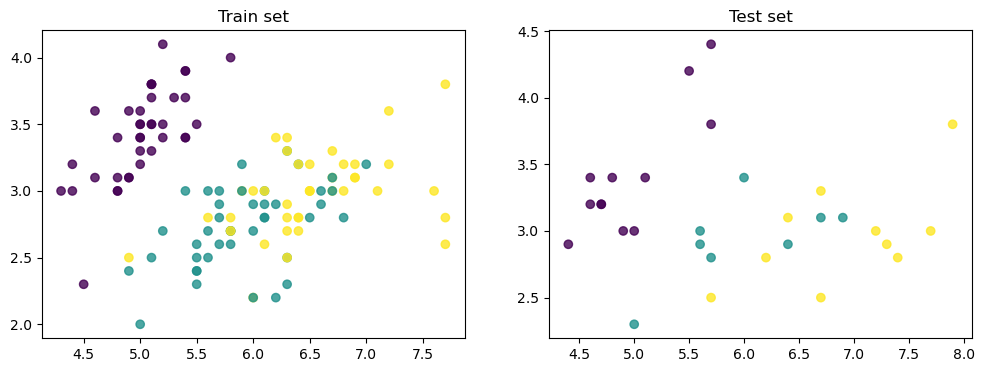

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
print(f'Train score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')

Train score: 0.95
Test score: 1.0


# cross_val_score

In [23]:
from sklearn.model_selection import cross_val_score

In [45]:
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9416666666666667

C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


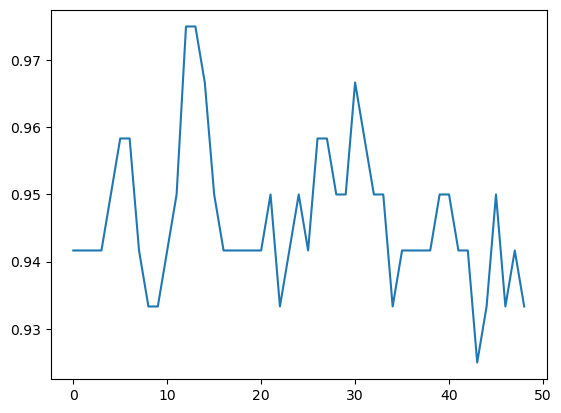

In [47]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

# validation_curve

In [49]:
from sklearn.model_selection import validation_curve

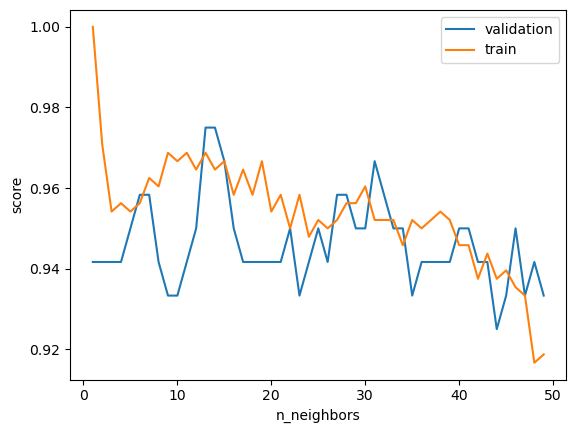

In [63]:
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(
    model, X_train, y_train,
    param_name='n_neighbors', 
    param_range= k, 
    cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()


# GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {
    'n_neighbors': np.arange(1,20),
    'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [77]:
grid.best_score_

0.975

In [79]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 13}

In [81]:
model = grid.best_estimator_

In [83]:
model.score(X_test, y_test)

0.9666666666666667

# confusion_matrix

In [88]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test, model.predict(X_test))

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

# learning_curve

In [93]:
from sklearn.model_selection import learning_curve

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 271, in predict
    neigh_ind = self.kneigh

[ 9 19 28 38 48 57 67 76 86 96]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 271, in predict
    neigh_ind = self.kneigh

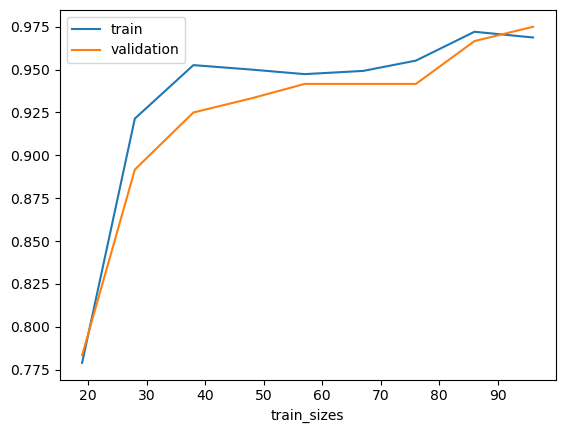

In [109]:
N , train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()